
# Task-1

# TITANIC CLASSIFICATION

In [11]:
import numpy as np
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [25]:
df= pd.read_csv('Data_set.csv')
df.head()

,Passenger ID,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,3.0,Silas,Male,21.0,0.0,0.0,A/5 21987,"79,364",NaN,S
1,2.0,0.0,1.0,Oacar,Female,34.0,1.0,0.0,345232,643728,C85,D
2,3.0,0.0,2.0,James,Female,19.0,1.0,0.0,Pc/87634,825.89,NaN,A
3,4.0,1.0,3.0,Ellis,Male,42.0,1.0,0.0,146734,7.9743,C97,S
4,5.0,1.0,1.0,Aaren,Male,28.0,0.0,0.0,86346,9.63452,C32,S


In [26]:
df.isnull()

,Passenger ID,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,True,True,True,True,True,True,True,True,True


<Axes: xlabel='Survived', ylabel='count'>

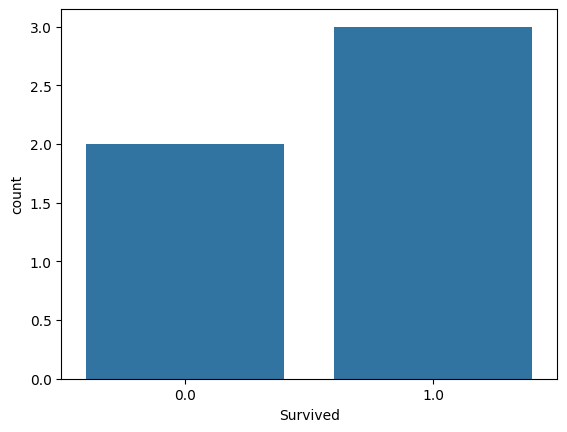

In [16]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

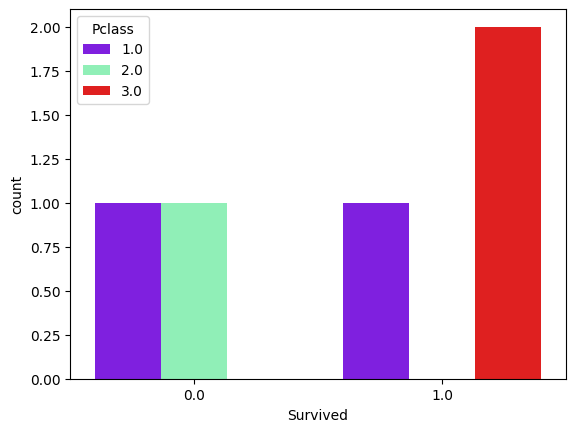

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

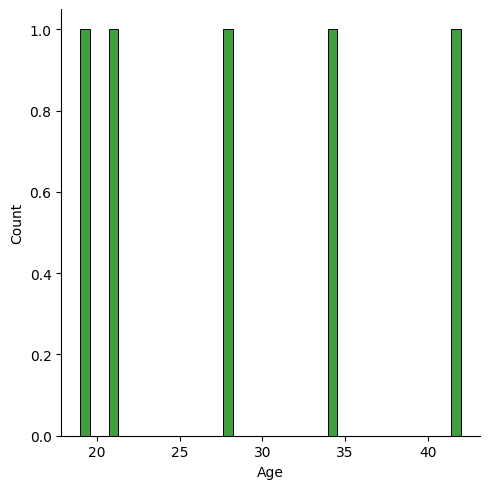

In [36]:
sns.displot(train['Age'].dropna(), kde=False, color='green', bins=40)

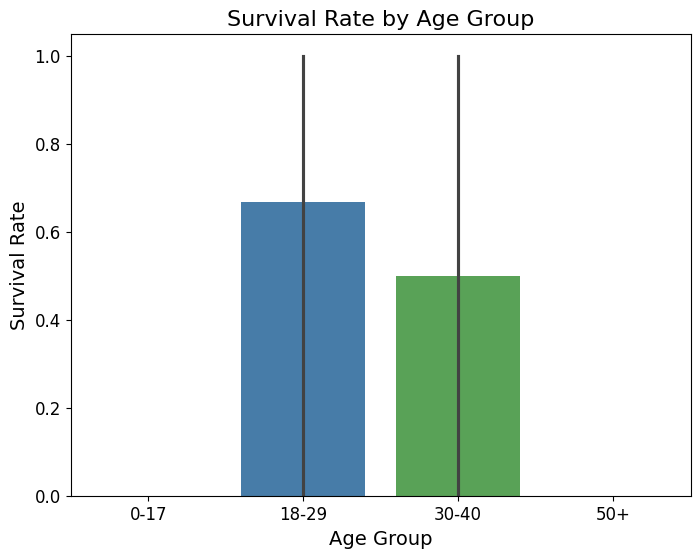

In [39]:
# Create age groups
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100], labels=['0-17', '18-29', '30-40', '50+'])

# Plot survival rate by age group
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=train, palette='Set1')
plt.title('Survival Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1000x800 with 0 Axes>

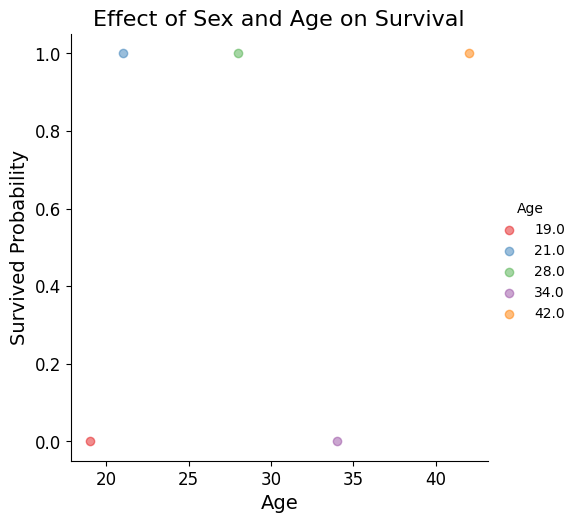

In [24]:
# Plotting the effect of sex and age on survival
plt.figure(figsize=(10, 8))
sns.lmplot(x='Age', y='Survived', hue='Age', data=df, palette='Set1', logistic=True, scatter_kws={'alpha':0.5})
plt.title('Effect of Sex and Age on Survival', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Survived Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

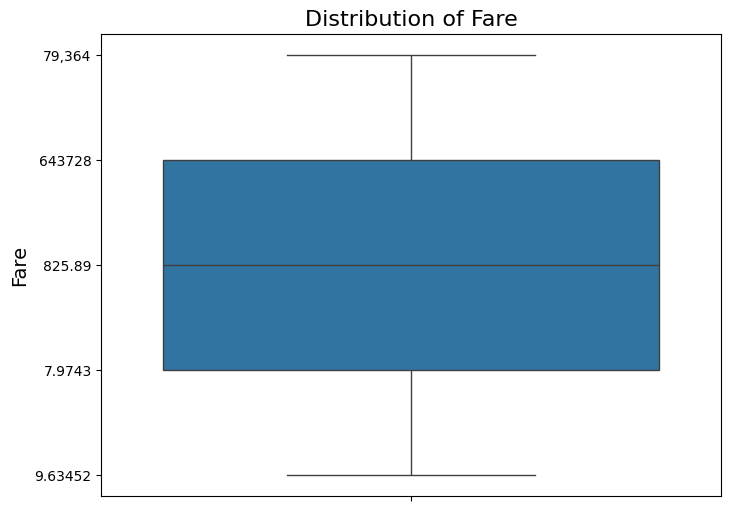

TypeError: can only concatenate str (not "int") to str

In [45]:
# Plotting the Fare column
plt.figure(figsize=(8, 6))
sns.boxplot(y="Fare", data=train)
plt.title('Distribution of Fare', fontsize=16)
plt.ylabel('Fare', fontsize=14)
plt.show()

# Checking the mean and median
print("Mean value of Fare is:", train.Fare.mean())
print("Median value of Fare is:", train.Fare.median())


In [29]:
# Print the column names to verify the correct names
print(df.columns)

# Assuming the correct column names are 'SibSp' and 'Parch'
if 'SibSp' in df.columns and 'Parch' in df.columns:
    # Create the 'FamilySize' feature
    df['FamilySize'] = df['SibSp'] + df['Parch']

    # Plot the survival rate by family size
    plt.figure(figsize=(10, 6))
    sns.barplot(x='FamilySize', y='Survived', data=df, palette='Set2')
    plt.title('Survival Rate by Family Size', fontsize=16)
    plt.xlabel('Family Size', fontsize=14)
    plt.ylabel('Survival Rate', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
else:
    print("Columns 'SibSp' or 'Parch' not found in the DataFrame.")


Index(['Passenger ID', 'Survived', 'Pclass', 'Name', 'Sex ', 'Age', 'Sibsp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title'],
      dtype='object')
Columns 'SibSp' or 'Parch' not found in the DataFrame.


# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

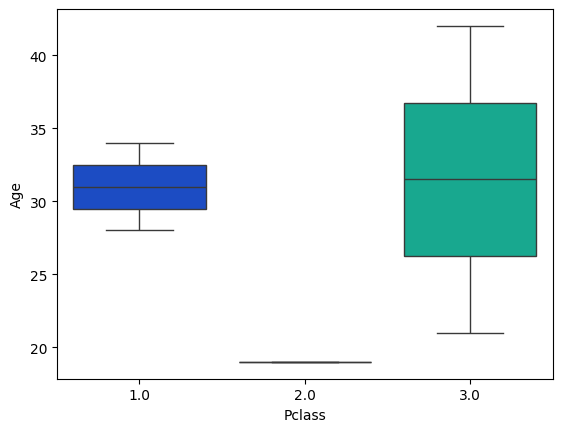

In [48]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Replacing Value

In [50]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
            return Age

In [51]:
train['Age']=train[['Age', 'Pclass']].apply(input_age, axis=1)

<Axes: >

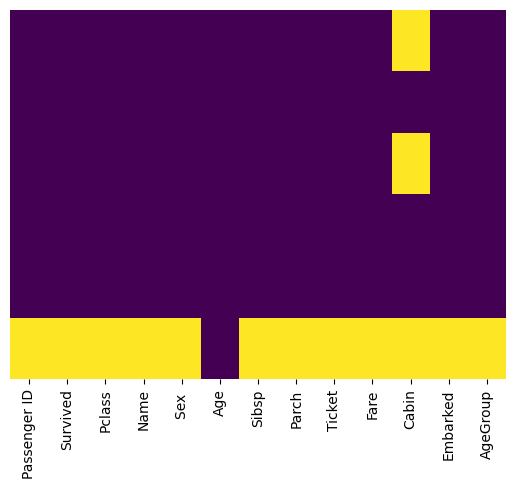

In [52]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
train.drop('Cabin', axis=1,inplace=True)
train.head()

,Passenger ID,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1.0,1.0,3.0,Silas,Male,21.0,0.0,0.0,A/5 21987,"79,364",S,18-29
1,2.0,0.0,1.0,Oacar,Female,34.0,1.0,0.0,345232,643728,D,30-40
2,3.0,0.0,2.0,James,Female,19.0,1.0,0.0,Pc/87634,825.89,A,18-29
3,4.0,1.0,3.0,Ellis,Male,42.0,1.0,0.0,146734,7.9743,S,30-40
4,5.0,1.0,1.0,Aaren,Male,28.0,0.0,0.0,86346,9.63452,S,18-29


# Converting categorical things map

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Passenger ID  5 non-null      float64 
 1   Survived      5 non-null      float64 
 2   Pclass        5 non-null      float64 
 3   Name          5 non-null      object  
 4   Sex           5 non-null      object  
 5   Age           6 non-null      float64 
 6   Sibsp         5 non-null      float64 
 7   Parch         5 non-null      float64 
 8   Ticket        5 non-null      object  
 9   Fare          5 non-null      object  
 10  Embarked      5 non-null      object  
 11  AgeGroup      5 non-null      category
dtypes: category(1), float64(6), object(5)
memory usage: 866.0+ bytes


In [55]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,D,S
0,False,True
1,True,False
2,False,False
3,False,True
4,False,True


In [34]:
sex=pd.get_dummies(df['Age'], drop_first=True)
embark=pd.get_dummies(df['Embarked'], drop_first=True)

In [59]:
train.drop(['Embarked', 'Name', 'Ticket'],axis=1, inplace=True)
train.head()

,Passenger ID,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,AgeGroup
0,1.0,1.0,3.0,Male,21.0,0.0,0.0,"79,364",18-29
1,2.0,0.0,1.0,Female,34.0,1.0,0.0,643728,30-40
2,3.0,0.0,2.0,Female,19.0,1.0,0.0,825.89,18-29
3,4.0,1.0,3.0,Male,42.0,1.0,0.0,7.9743,30-40
4,5.0,1.0,1.0,Male,28.0,0.0,0.0,9.63452,18-29


In [71]:
train=pd.concat([train],axis=1)
train.head()

,Passenger ID,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,AgeGroup
0,1.0,1.0,3.0,Male,21.0,0.0,0.0,"79,364",18-29
1,2.0,0.0,1.0,Female,34.0,1.0,0.0,643728,30-40
2,3.0,0.0,2.0,Female,19.0,1.0,0.0,825.89,18-29
3,4.0,1.0,3.0,Male,42.0,1.0,0.0,7.9743,30-40
4,5.0,1.0,1.0,Male,28.0,0.0,0.0,9.63452,18-29


# Logistic model

# Train Test Split

In [72]:
train.drop('Survived',axis=1).head()

,Passenger ID,Pclass,Sex,Age,Sibsp,Parch,Fare,AgeGroup
0,1.0,3.0,Male,21.0,0.0,0.0,"79,364",18-29
1,2.0,1.0,Female,34.0,1.0,0.0,643728,30-40
2,3.0,2.0,Female,19.0,1.0,0.0,825.89,18-29
3,4.0,3.0,Male,42.0,1.0,0.0,7.9743,30-40
4,5.0,1.0,Male,28.0,0.0,0.0,9.63452,18-29


In [73]:
train['Survived'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Survived, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'], test_size=0.30,
                                                   random_state=101) 

In [76]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

# Dropping some unnecessary columns

In [16]:
df.drop(columns=['Name', 'Ticket'],axis=1,inplace=True)
df.columns

Index(['Passenger ID', 'Survived', 'Pclass', 'Sex ', 'Age', 'Sibsp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger ID  5 non-null      float64
 1   Survived      5 non-null      float64
 2   Pclass        5 non-null      float64
 3   Sex           5 non-null      object 
 4   Age           5 non-null      float64
 5   Sibsp         5 non-null      float64
 6   Parch         5 non-null      float64
 7   Fare          5 non-null      object 
 8   Cabin         3 non-null      object 
 9   Embarked      5 non-null      object 
dtypes: float64(6), object(4)
memory usage: 608.0+ bytes


In [18]:
df.describe()

,Passenger ID,Survived,Pclass,Age,Sibsp,Parch
count,5.000000,5.000000,5.0,5.000000,5.000000,5.0
mean,3.000000,0.600000,2.0,28.800000,0.600000,0.0
std,1.581139,0.547723,1.0,9.471008,0.547723,0.0
min,1.000000,0.000000,1.0,19.000000,0.000000,0.0
25%,2.000000,0.000000,1.0,21.000000,0.000000,0.0
50%,3.000000,1.000000,2.0,28.000000,1.000000,0.0
75%,4.000000,1.000000,3.0,34.000000,1.000000,0.0
max,5.000000,1.000000,3.0,42.000000,1.000000,0.0


In [21]:
df.describe(include='O')

,Sex,Fare,Cabin,Embarked
count,5,5,3,5
unique,2,5,3,3
top,Male,"79,364",C85,S
freq,3,1,1,3


# Converting categorical data of sex column into numerical

In [31]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)
df.head()

,Passenger ID,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,3.0,Male,21.0,0.0,0.0,"79,364",NaN,S
1,2.0,0.0,1.0,Female,34.0,1.0,0.0,643728,C85,D
2,3.0,0.0,2.0,Female,19.0,1.0,0.0,825.89,NaN,A
3,4.0,1.0,3.0,Male,42.0,1.0,0.0,7.9743,C97,S
4,5.0,1.0,1.0,Male,28.0,0.0,0.0,9.63452,C32,S


# Splitting the data set into train and test

In [32]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# WE USED 20% OF THE DATA FOR TESTING